# Librerias necesarias y dataFrame

In [55]:
import pandas as pd
import numpy as np
import re
import unicodedata
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Datos
data = {
    'Texto': [
        "Aprendi regresiones", "El profe no da mas tiempo en las tareas",
        "Las office hours son en un horario muy maluco y no el profe no contesta los correos",
        "Tareas muy largas y toca dedicar mucho tiempo", "Aprendi a utilizar imágenes",
        "El profe se demora en entregar las notas", "La tarea de clasificar las plantas me gusto",
        "Los examenes son dificiles y largos", "Me gusta cuando el profe resuelve los problemas en excel",
        "Utilizar texto es util y aprender NLP", "Las redes neuronales me parecen poderosas y me gusto la parte practica",
        "Falto aprender mas spark", "Las office hours son los sabados y no me gusta madrugar",
        "Aprendi python y pandas", "Me gusto trabajar con datos reales", "Aprendi que es un cluster",
        "Las tareas son practicas con datos reales", "las derivadas son muy utiles y me gusto la matematica",
        "Pandas es com un excel y me gusto", "es aburrido el tema y me distraigo en la parte teorica",
        "Es dificl y me toco cancelar la materia"
    ],
    'Sentimiento': [
        'Positivo', 'Negativo', 'Negativo', 'Negativo', 'Positivo', 'Negativo', 'Positivo', 'Negativo',
        'Positivo', 'Positivo', 'Positivo', 'Negativo', 'Negativo', 'Positivo', 'Positivo', 'Positivo',
        'Positivo', 'Positivo', 'Positivo', 'Negativo', 'Negativo'
    ]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Procesar el texto antes de usarlo

In [56]:
nltk.download('stopwords')
tokenizer = ToktokTokenizer()
stopwords_spanish = set(stopwords.words('spanish'))

def eliminar_acentos(texto):
    return ''.join(c for c in unicodedata.normalize('NFKD', texto) if not unicodedata.combining(c))

def preprocesar_texto(texto):
    texto = eliminar_acentos(texto)
    texto = texto.lower()
    texto = re.sub(r'\W+', ' ', texto)
    return texto

df['Texto'] = df['Texto'].apply(preprocesar_texto)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Funciones para frecuencia de palabras

In [57]:
def contar_palabras(textos):
    diccionario_palabras = defaultdict(int)
    for texto in textos:
        palabras = tokenizer.tokenize(texto)
        palabras = [palabra.strip() for palabra in palabras if palabra not in stopwords_spanish]
        for palabra in palabras:
            diccionario_palabras[palabra] += 1
    return diccionario_palabras

frecuencia_palabras = contar_palabras(df['Texto'])
palabras_ordenadas = sorted(frecuencia_palabras.items(), key=lambda x: x[1], reverse=True)


# Gráfico de las palabras más usadas

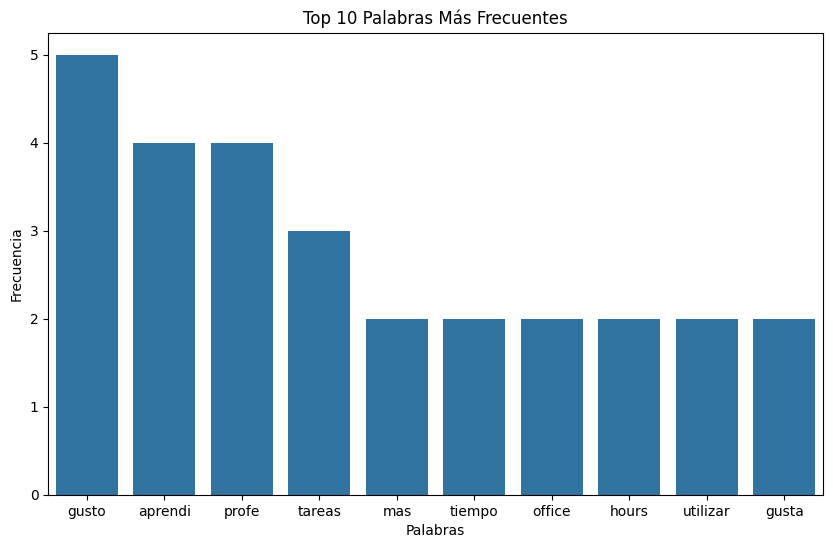

In [58]:
top_10_palabras = palabras_ordenadas[:10]
palabras, frecuencias = zip(*top_10_palabras)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x=list(palabras), y=list(frecuencias))
plt.title('Top 10 Palabras Más Frecuentes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

# Correlación con el Sentimiento, matriz TF-IDF


In [59]:
vectorizer = TfidfVectorizer(stop_words=list(stopwords_spanish))
tfidf_matrix = vectorizer.fit_transform(df['Texto'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Sentimiento en el df y correlación

In [60]:
# Mapeo del sentimiento
df['Sentimiento'] = df['Sentimiento'].map({'Positivo': 1, 'Negativo': 0})

correlacion = tfidf_df.corrwith(df['Sentimiento'])
correlacion_ordenada = correlacion.sort_values(ascending=False)
print("Correlación con el Sentimiento:")
print(correlacion_ordenada.head(10))

Correlación con el Sentimiento:
gusto          0.479342
aprendi        0.417412
reales         0.280944
datos          0.280944
pandas         0.280300
excel          0.280077
utilizar       0.276691
regresiones    0.193649
nlp            0.193649
util           0.193649
dtype: float64


# Ordenar la Matriz TF-IDF por el numero de uso de las palabras

In [43]:
palabras_ordenadas_por_frecuencia = [palabra for palabra, frecuencia in palabras_ordenadas]
tfidf_df_ordenada = tfidf_df[palabras_ordenadas_por_frecuencia]

print("Matriz TF-IDF Ordenada:")
print(tfidf_df_ordenada.head())

Matriz TF-IDF Ordenada:
   gusto   aprendi     profe    tareas       mas    tiempo    office  \
0    0.0  0.589788  0.000000  0.000000  0.000000  0.000000  0.000000   
1    0.0  0.000000  0.378754  0.412811  0.456719  0.456719  0.000000   
2    0.0  0.000000  0.296079  0.000000  0.000000  0.000000  0.357026   
3    0.0  0.000000  0.000000  0.379085  0.000000  0.419405  0.000000   
4    0.0  0.480633  0.000000  0.000000  0.000000  0.000000  0.000000   

      hours  utilizar  gusta  ...  matematica  com  aburrido  tema  distraigo  \
0  0.000000  0.000000    0.0  ...         0.0  0.0       0.0   0.0        0.0   
1  0.000000  0.000000    0.0  ...         0.0  0.0       0.0   0.0        0.0   
2  0.357026  0.000000    0.0  ...         0.0  0.0       0.0   0.0        0.0   
3  0.000000  0.000000    0.0  ...         0.0  0.0       0.0   0.0        0.0   
4  0.000000  0.579568    0.0  ...         0.0  0.0       0.0   0.0        0.0   

   teorica  dificl  toco  cancelar  materia  
0      0.0

# Inicializar los parámetros y funciones necesarias


In [19]:
# Inicialización de parámetros
m, n = tfidf_df.shape
W = np.zeros(n)
b = 0
learning_rate = 0.5
epochs = 1000
batch_size = 3

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de pérdida (log-loss)
def log_loss(y_true, y_pred):
    return - np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Implementar el gradiente descendiente

In [20]:
# Descenso de gradiente por lotes
for epoch in range(epochs):
    for i in range(0, m, batch_size):
        X_batch = tfidf_df.iloc[i:i+batch_size]
        y_batch = df['Sentimiento'].iloc[i:i+batch_size]

        # Cálculo de la hipótesis
        z = np.dot(X_batch, W) + b
        y_pred = sigmoid(z)

        # Cálculo de la pérdida
        loss = log_loss(y_batch, y_pred)

        # Cálculo de los gradientes
        dw = (1 / batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
        db = (1 / batch_size) * np.sum(y_pred - y_batch)

        # Actualización de los parámetros
        W -= learning_rate * dw
        b -= learning_rate * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")


Epoch 0, Loss: 0.7558992724868075
Epoch 100, Loss: 0.052129745129435544
Epoch 200, Loss: 0.02546725739971706
Epoch 300, Loss: 0.016759377916898275
Epoch 400, Loss: 0.012466547694606122
Epoch 500, Loss: 0.009915927895840317
Epoch 600, Loss: 0.008227722247250708
Epoch 700, Loss: 0.007028555660605886
Epoch 800, Loss: 0.006133182174002785
Epoch 900, Loss: 0.005439332429266564


# Predicción y evaluación del modeli

In [21]:
# Predicción
z_test = np.dot(tfidf_df, W) + b
y_pred_test = sigmoid(z_test)
predicciones = [1 if i > 0.5 else 0 for i in y_pred_test]

# Evaluación
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df['Sentimiento'], predicciones)
print(f"Accuracy: {accuracy}")

# Usar el modelo para clasificar los textos y mostrar las clasificaciones
df['Predicción'] = predicciones

# Imprimir los textos junto con su sentimiento real y la predicción del modelo
resultado = df[['Texto', 'Sentimiento', 'Predicción']]
print("Resultados de la clasificación:")
print(resultado)

# Mostrar si las predicciones fueron correctas
df['Correcto'] = df['Sentimiento'] == df['Predicción']
print("\nPredicciones correctas:")
print(df['Correcto'].value_counts())

Accuracy: 1.0
Resultados de la clasificación:
                                                Texto  Sentimiento  Predicción
0                                 aprendi regresiones            1           1
1             el profe no da mas tiempo en las tareas            0           0
2   las office hours son en un horario muy maluco ...            0           0
3       tareas muy largas y toca dedicar mucho tiempo            0           0
4                         aprendi a utilizar imagenes            1           1
5            el profe se demora en entregar las notas            0           0
6         la tarea de clasificar las plantas me gusto            1           1
7                 los examenes son dificiles y largos            0           0
8   me gusta cuando el profe resuelve los problema...            1           1
9               utilizar texto es util y aprender nlp            1           1
10  las redes neuronales me parecen poderosas y me...            1           1
11    

In [22]:
# Inicialización de parámetros
m, n = tfidf_df.shape
W = np.zeros(n)
b = 0
learning_rate = 0.5
epochs = 6
batch_size = 3

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de pérdida (log-loss)
def log_loss(y_true, y_pred):
    return - np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Inicialización de la lista para registrar los coeficientes
coeficientes = []

# Descenso de gradiente por lotes
for epoch in range(epochs):
    for i in range(0, m, batch_size):
        X_batch = tfidf_df.iloc[i:i+batch_size]
        y_batch = df['Sentimiento'].iloc[i:i+batch_size]

        # Cálculo de la hipótesis
        z = np.dot(X_batch, W) + b
        y_pred = sigmoid(z)

        # Cálculo de la pérdida
        loss = log_loss(y_batch, y_pred)

        # Cálculo de los gradientes
        dw = (1 / batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
        db = (1 / batch_size) * np.sum(y_pred - y_batch)

        # Actualización de los parámetros
        W -= learning_rate * dw
        b -= learning_rate * db

        # Registro de los coeficientes después de cada actualización
        coeficientes.append((epoch + 1, W[0], W[1], W[2], W[3]))

        # Solo necesitamos los coeficientes de las primeras 4 características
        if len(coeficientes) >= 6:
            break
    if len(coeficientes) >= 6:
        break

# Crear DataFrame para la tabla de coeficientes
columnas = ['Iteracion', 'b1', 'b2', 'b3', 'b4']
tabla_coeficientes = pd.DataFrame(coeficientes[:6], columns=columnas)

# Mostrar la tabla
print("Tabla de coeficientes:")
print(tabla_coeficientes)


Tabla de coeficientes:
   Iteracion   b1        b2        b3   b4
0          1  0.0  0.000000  0.049149  0.0
1          1  0.0  0.000000  0.090397  0.0
2          1  0.0  0.000000  0.090397  0.0
3          1  0.0 -0.002675  0.090397  0.0
4          1  0.0 -0.002675  0.128818  0.0
5          1  0.0 -0.002675  0.173305  0.0
